In [ ]:
import re

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from collections import Counter
from nltk.util import ngrams

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CLASS/IMDB Dataset.csv')

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply preprocessing to each review in the dataframe
df['review'] = df['review'].apply(lambda x: word_tokenize(preprocess_text(x)))

In [ ]:
df = df[df["review"].str.strip() != '']
df

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[i, am, a, catholic, taught, in, parochial, el...",negative
49998,"[im, going, to, have, to, disagree, with, the,...",negative


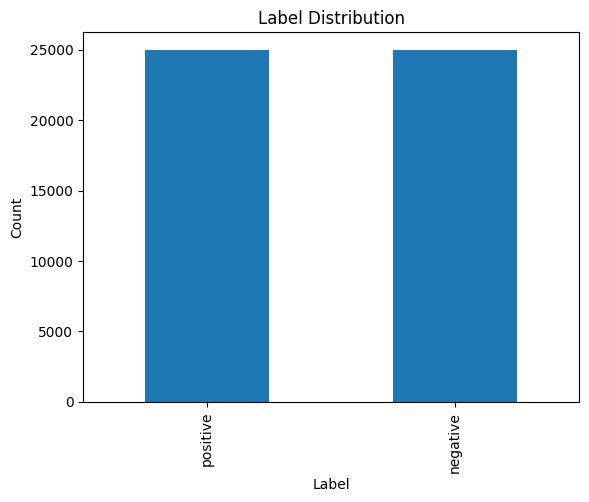

In [ ]:
df['sentiment'].value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
#n-grams and count frequencies
def generate_ngrams(words, n):
  ngram_counts = Counter()
  for tokens in words:
    ngrams_list = list(ngrams(tokens, n)) #n-grams from tokenized words
    ngram_counts.update(ngrams_list) #Update freq count for
  return ngram_counts

In [ ]:
# Generate n-grams for n = 1, n = 2, n = 3
unigrams = generate_ngrams(df["review"], 1)
bigrams = generate_ngrams(df["review"], 2)
trigrams = generate_ngrams(df["review"], 3)
quadgrams = generate_ngrams(df["review"], 4)
pentagrams = generate_ngrams(df["review"], 5)

In [ ]:
print(unigrams.most_common(10))
print(bigrams.most_common(10))
print(trigrams.most_common(10))
print(quadgrams.most_common(10))
print(pentagrams.most_common(10))

[(('the',), 663934), (('and',), 320704), (('a',), 320555), (('of',), 288389), (('to',), 266782), (('is',), 210168), (('in',), 184877), (('it',), 152920), (('i',), 152130), (('this',), 149414)]
[(('of', 'the'), 77084), (('in', 'the'), 50253), (('this', 'movie'), 30398), (('and', 'the'), 26430), (('is', 'a'), 26033), (('the', 'film'), 24419), (('to', 'the'), 23649), (('to', 'be'), 23227), (('the', 'movie'), 22512), (('this', 'film'), 20990)]
[(('one', 'of', 'the'), 9782), (('this', 'movie', 'is'), 5196), (('this', 'is', 'a'), 4742), (('a', 'lot', 'of'), 4676), (('of', 'the', 'film'), 4658), (('of', 'the', 'movie'), 4043), (('some', 'of', 'the'), 3757), (('the', 'film', 'is'), 3654), (('is', 'one', 'of'), 3540), (('this', 'film', 'is'), 3464)]
[(('is', 'one', 'of', 'the'), 2224), (('the', 'rest', 'of', 'the'), 1999), (('one', 'of', 'the', 'most'), 1655), (('one', 'of', 'the', 'best'), 1560), (('the', 'end', 'of', 'the'), 1402), (('this', 'is', 'one', 'of'), 1244), (('i', 'have', 'ever', '

In [ ]:
def calculate_ngram_probabilities(ngram_counts, counts_n_minus1):
  ngram_probabilities = {}
  for ngram in ngram_counts:
    n_minus1 = ngram[:-1]
    ngram_probabilities[ngram] = ngram_counts[ngram]/(counts_n_minus1[n_minus1])
  return ngram_probabilities

In [ ]:
# Calculate bigram probabilities: P(w2 | w1)
bigram_probabilities = calculate_ngram_probabilities(bigrams, unigrams)

# Calculate trigram probabilities: P(w3 | w1, w2)
trigram_probabilities = calculate_ngram_probabilities(trigrams, bigrams)
# Calculate quadragrams probabilities: P(w4|w1, w2, w3)
quadgram_probabilities = calculate_ngram_probabilities(quadgrams, trigrams)

# Calculate pentagrams probabilities: P(w5|w1, w2, w3)
pentagram_probabilities = calculate_ngram_probabilities(pentagrams, quadgrams)

for bigram, prob in list(bigram_probabilities.items())[:5]:
    print(f"{bigram}: {prob}")

for trigram, prob in list(trigram_probabilities.items())[:5]:
    print(f"{trigram}: {prob}")

for quadgram, prob in list(quadgram_probabilities.items())[:5]:
    print(f"{quadgram}: {prob}")

for pentagram, prob in list(pentagram_probabilities.items())[:5]:
    print(f"{pentagram}: {prob}")

('one', 'of'): 0.3165712941914243
('of', 'the'): 0.26729174829830543
('the', 'other'): 0.007204029316166968
('other', 'reviewers'): 0.009491903964265773
('reviewers', 'has'): 0.00398406374501992
('one', 'of', 'the'): 0.6055466138417729
('of', 'the', 'other'): 0.007589123553526023
('the', 'other', 'reviewers'): 0.014007944804515993
('other', 'reviewers', 'has'): 0.0058823529411764705
('reviewers', 'has', 'mentioned'): 0.5
('one', 'of', 'the', 'other'): 0.00531588632181558
('of', 'the', 'other', 'reviewers'): 0.042735042735042736
('the', 'other', 'reviewers', 'has'): 0.014925373134328358
('other', 'reviewers', 'has', 'mentioned'): 1.0
('reviewers', 'has', 'mentioned', 'that'): 1.0
('one', 'of', 'the', 'other', 'reviewers'): 0.1346153846153846
('of', 'the', 'other', 'reviewers', 'has'): 0.04
('the', 'other', 'reviewers', 'has', 'mentioned'): 1.0
('other', 'reviewers', 'has', 'mentioned', 'that'): 1.0
('reviewers', 'has', 'mentioned', 'that', 'after'): 1.0


# Laplace Smoothing

In [ ]:
#laplace smothing
def calculate_ngram_probabilities_with_smoothing(ngram_counts, counts_n_minus1, voc_size, n):
  ngram_probabilities = {}
  for ngram in ngram_counts:
        n_minus_1_gram = ngram[:-1]
        ngram_probabilities[ngram] = (ngram_counts[ngram] + 1) / (counts_n_minus1.get(n_minus_1_gram, 0) + voc_size)
  return ngram_probabilities
voc_size = len(unigrams)
bigram_probabilities_smoothed = calculate_ngram_probabilities_with_smoothing(bigrams, unigrams, voc_size, 2)
trigram_probabilities_smoothed = calculate_ngram_probabilities_with_smoothing(trigrams, bigrams, voc_size, 3)
quadgram_probabilities_smoothed = calculate_ngram_probabilities_with_smoothing(quadgrams, trigrams, voc_size, 4)
pentagram_probabilities_smoothed = calculate_ngram_probabilities_with_smoothing(pentagrams, quadgrams, voc_size, 5)

In [ ]:
print("Laplace Smoothed Probabilities for Bigrams:")
for bigram, prob in list(bigram_probabilities_smoothed.items())[:5]:   #Display first 5
    print(f"{bigram}: {prob:.6f}")

print("\nLaplace Smoothed Probabilities for Trigrams:")
for trigram, prob in list(trigram_probabilities_smoothed.items())[:5]:
    print(f"{trigram}: {prob:.6f}")

print("\nLaplace Smoothed Probabilities for Quadgrams:")
for quadgram, prob in list(quadgram_probabilities_smoothed.items())[:5]:
    print(f"{quadgram}: {prob:.6f}")

print("\nLaplace Smoothed Probabilities for Pentagrams:")
for pentagram, prob in list(pentagram_probabilities_smoothed.items())[:5]:
    print(f"{pentagram}: {prob:.6f}")

Laplace Smoothed Probabilities for Bigrams:
('one', 'of'): 0.071194
('of', 'the'): 0.166033
('the', 'other'): 0.005696
('other', 'reviewers'): 0.000882
('reviewers', 'has'): 0.000017

Laplace Smoothed Probabilities for Trigrams:
('one', 'of', 'the'): 0.050943
('of', 'the', 'other'): 0.002316
('the', 'other', 'reviewers'): 0.000376
('other', 'reviewers', 'has'): 0.000011
('reviewers', 'has', 'mentioned'): 0.000011

Laplace Smoothed Probabilities for Quadgrams:
('one', 'of', 'the', 'other'): 0.000285
('of', 'the', 'other', 'reviewers'): 0.000147
('the', 'other', 'reviewers', 'has'): 0.000011
('other', 'reviewers', 'has', 'mentioned'): 0.000011
('reviewers', 'has', 'mentioned', 'that'): 0.000011

Laplace Smoothed Probabilities for Pentagrams:
('one', 'of', 'the', 'other', 'reviewers'): 0.000045
('of', 'the', 'other', 'reviewers', 'has'): 0.000011
('the', 'other', 'reviewers', 'has', 'mentioned'): 0.000011
('other', 'reviewers', 'has', 'mentioned', 'that'): 0.000011
('reviewers', 'has', 'm

 $GOOD$    -- $TURING$ --  $DISCOUNTING$

In [ ]:
def good_turing_discounting(ngram_counts, smoothing_factor=1):
    # Frequencies counts
    frequency_counts = Counter(ngram_counts.values())
    # Good-Turing estimates
    good_turing_estim = {}
    total_ngrams = sum(frequency_counts.values())

    for ngram, count in ngram_counts.items():
        if count > 0:
            c_next = frequency_counts.get(count + 1, 0)
            estimate = (count + smoothing_factor) * c_next / (frequency_counts[count] + smoothing_factor) if frequency_counts[count] > 0 else 0
            good_turing_estim[ngram] = estimate
        else:
            # Unseen n-grams
            good_turing_estim[ngram] = (frequency_counts[1] + smoothing_factor) / (total_ngrams + smoothing_factor)

    return good_turing_estim


In [ ]:
good_turing_bigrams = good_turing_discounting(bigrams)

print("Good-Turing Estimates for Bigrams:")
for bigram, estimate in list(good_turing_bigrams.items())[:10]:
    print(f"{bigram}: {estimate:.6f}")

Good-Turing Estimates for Bigrams:
('one', 'of'): 0.000000
('of', 'the'): 0.000000
('the', 'other'): 0.000000
('other', 'reviewers'): 117.737705
('reviewers', 'has'): 1.204463
('has', 'mentioned'): 12.074639
('mentioned', 'that'): 67.072340
('that', 'after'): 96.657534
('after', 'watching'): 0.000000
('watching', 'just'): 33.282209


##**Kneser Ney Smoothing techhnique**

In [ ]:
def kneser_ney_smoothing(ngram_counts, lower_order_counts, discount=0.75):
    kneser_ney_probabilities = {}
    total_lower_order = sum(lower_order_counts.values())

    for ngram, count in ngram_counts.items():
        n_minus_1_gram = ngram[:-1]

        # Discounting observed n-grams
        if count > 0:
            kneser_ney_probabilities[ngram] = max(count - discount, 0) / total_lower_order
        else:
            # Probability for unseen n-grams
            kneser_ney_probabilities[ngram] = lower_order_counts[n_minus_1_gram] / total_lower_order

    return kneser_ney_probabilities


In [ ]:
kneser_ney_bigrams = kneser_ney_smoothing(bigrams, unigrams)


print("Kneser-Ney Estimates for Bigrams:")
for bigram, estimate in list(kneser_ney_bigrams.items())[:10]:
    print(f"{bigram}: {estimate:.6f}")

Kneser-Ney Estimates for Bigrams:
('one', 'of'): 0.001409
('of', 'the'): 0.006726
('the', 'other'): 0.000417
('other', 'reviewers'): 0.000015
('reviewers', 'has'): 0.000000
('has', 'mentioned'): 0.000001
('mentioned', 'that'): 0.000006
('that', 'after'): 0.000013
('after', 'watching'): 0.000053
('watching', 'just'): 0.000003


$ Evaluate$ $Model$ $Performance $

In [ ]:
import numpy as np

def calculate_perplexity(probabilities, test_set):
    log_prob_sum = 0
    total_words = 0
#iterating through the dataset for each token
    for review in test_set:
      for word in review:
        if word in probabilities:
            log_prob_sum += np.log(probabilities[word])
        else:
            log_prob_sum += np.log(1e-10)  # Small value for unseen words
        total_words += 1

    perplexity = np.exp(-log_prob_sum / total_words) if total_words > 0 else float('inf')
    return perplexity


## Cross validation

In [ ]:
from sklearn.model_selection import KFold

# Cross Validation Test
def cross_validate(data, n_splits=5, n=2):
    kf = KFold(n_splits=n_splits)
    perplexities = []

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]['review']
        test_data = data.iloc[test_index]['review']

        # Generate n-grams and calculate probabilities
        ngram_counts = generate_ngrams(train_data, n)
        unigrams = generate_ngrams(train_data, 1)

        # Use Kneser-Ney smoothing (or Good-Turing)
        probabilities = good_turing_discounting(ngram_counts)
        #probabilities = kneser_ney_smoothing(ngram_counts, unigrams)
        #probabilities = calculate_ngram_probabilities_with_smoothing(ngram_counts, unigrams, voc_size=len(unigrams), n=n)

        # Calculate perplexity for the test set
        perplexity = calculate_perplexity(probabilities, test_data)/10000000000
        print(f'Fold Perplexity: {perplexity}')
        perplexities.append(perplexity)

    return np.mean(perplexities), np.std(perplexities)



##**testing**

In [ ]:
mean_perplexity, std_perplexity = cross_validate(df, n_splits=3, n=2)
print(f'Mean Perplexity: {mean_perplexity}, Std Deviation: {std_perplexity}')

Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Mean Perplexity: 1.0000000012168746, Std Deviation: 6.176870336332183e-12


# **Visualisation**

Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265
Fold Perplexity: 1.0000000012252814
Fold Perplexity: 1.0000000012106158
Fold Perplexity: 1.0000000012147265


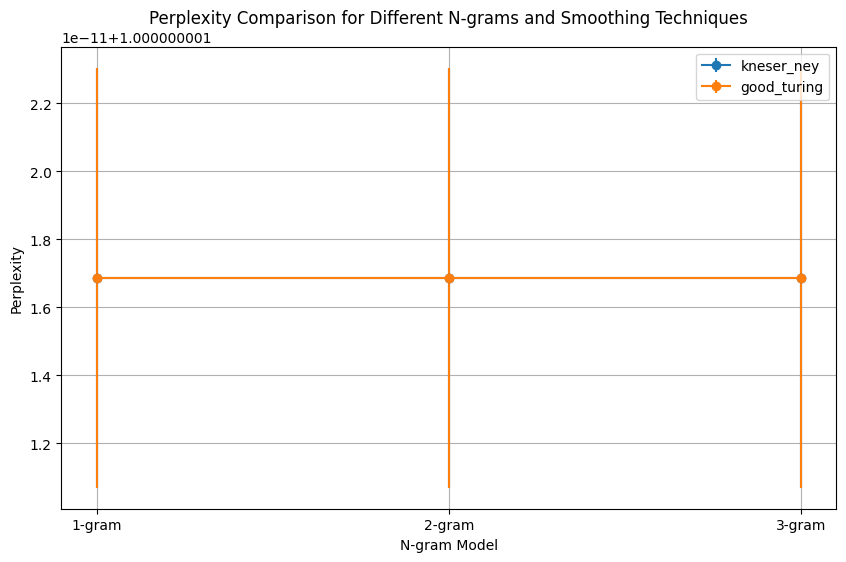

In [ ]:
# Sizes and smoothing methods
n_values = [1, 2, 3]
smoothing_methods = ['kneser_ney', 'good_turing']
results = {}

# Cross-validation for each n-gram size and smoothing technique
for n in n_values:
    results[n] = {}
    for smoothing in smoothing_methods:
        mean_perplexity, std_perplexity = cross_validate(df, n_splits=3, n=n)
        results[n][smoothing] = (mean_perplexity, std_perplexity)

n_gram_labels = [f'{n}-gram' for n in n_values]

plt.figure(figsize=(10, 6))

# Plotting without scaling
for smoothing in smoothing_methods:
    perplexities = [results[n][smoothing][0] for n in n_values]
    std_devs = [results[n][smoothing][1] for n in n_values]

    plt.errorbar(n_gram_labels, perplexities, yerr=std_devs, fmt='-o', label=smoothing)

# Plot formatting
plt.xlabel('N-gram Model')
plt.ylabel('Perplexity')
plt.title('Perplexity Comparison for Different N-grams and Smoothing Techniques')
plt.legend()
plt.grid(True)
plt.show()


## Findings on N-gram Size and Smoothing Techniques

The **perplexity** values for different **n-gram sizes** (1-gram, 2-gram, 3-gram) and **smoothing techniques** (Kneser-Ney, Good-Turing) show minimal variations across the models. This suggests that for the dataset used, the impact of increasing the n-gram size does not significantly improve language model performance, as reflected by the relatively flat perplexity values.

- **Good-Turing smoothing** exhibits consistent perplexity values across all n-gram sizes. However, the error bars are substantial, indicating potential instability or a wide range in performance.
- **Kneser-Ney smoothing** appears to have produced perplexity values close to zero, which is unexpected and suggests possible numerical instability or that the probabilities might have been calculated incorrectly, especially for rare tokens.

### Smoothing Techniques Impact

The **Good-Turing smoothing** technique maintains higher perplexity values but within a narrow range. This suggests that it is a more consistent method when moving from unigram (1-gram) to trigram (3-gram) models. However, its relatively high error bars indicate that the model could be sensitive to certain n-gram structures or specific tokens within the dataset.

On the other hand, **Kneser-Ney smoothing** shows near-zero perplexity values for all n-gram sizes, which may suggest that it overfits the training data or assigns excessively high probabilities to seen events, thus underestimating perplexity. This may be attributed to how it redistributes probabilities from high-frequency to low-frequency events, which could lead to these unexpected results.

### Trade-offs between Model Complexity and Accuracy

As we move from simpler models (1-gram) to more complex models (2-gram, 3-gram), we expect perplexity to decrease, reflecting better performance. However, in this case, the change in model complexity doesn't seem to affect perplexity significantly for either smoothing technique.

This suggests a potential **trade-off**:
- Increasing model complexity (higher n-grams) did not yield significant improvements in performance, as evidenced by the flat perplexity values.
- **Good-Turing** smoothing maintains a consistent, though somewhat high perplexity, whereas **Kneser-Ney** may need further tuning or investigation due to the observed anomaly in its values.

The results imply that **increasing n-gram size** or **switching smoothing techniques** doesn't always guarantee better performance. Model evaluation using perplexity should be paired with further diagnostic checks to ensure the reliability of results, especially when dealing with specific datasets or rare tokens.


In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git clone https://github.com/XdstruCTor/NLP.git

fatal: destination path 'NLP' already exists and is not an empty directory.


In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/n-gram.ipynb /content/NLP

In [ ]:
%cd /content/NLP

/content/NLP


In [ ]:
!git add n-gram.ipynb

In [ ]:
!git remote set-url origin git@github.com:XdstruCTor/NLP.git

In [ ]:
!git push origin main

Load key "/root/.ssh/id_rsa": error in libcrypto
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!ssh -T git@github.com


Load key "/root/.ssh/id_rsa": error in libcrypto
git@github.com: Permission denied (publickey).
